In [49]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor

In [50]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C, Matern, RationalQuadratic as RQ, ExpSineSquared as Exp, DotProduct as Lin
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV

In [51]:
import matplotlib.pyplot as plt

In [52]:
train_data = pd.read_csv('train.csv')

In [53]:
# for predicting tgd consultancy

In [54]:
tgd_consultancy_inputs = train_data.drop(['TGD Consultancy Share price', 'TGD Power Share price', 'TGD Automobiles Share price'], axis=1)

In [55]:
tgd_consultancy_inputs

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,2142-11-23,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161764,2142-11-24,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161765,2142-11-25,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161766,2142-11-26,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99


In [56]:
tgd_consultancy_outputs = train_data['TGD Consultancy Share price']

In [57]:
tgd_consultancy_outputs

0         519.0
1         518.0
2         523.0
3         522.0
4         522.0
          ...  
161763    498.0
161764    502.0
161765    508.0
161766    507.0
161767    499.0
Name: TGD Consultancy Share price, Length: 161768, dtype: float64

In [58]:
tgd_consultancy_inputs['dates'] = pd.to_datetime(tgd_consultancy_inputs['dates'])

In [59]:
tgd_consultancy_inputs

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,2142-11-23,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161764,2142-11-24,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161765,2142-11-25,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161766,2142-11-26,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99


In [60]:
Y = np.array([tgd_consultancy_inputs['dates'][i].timestamp() for i in range(len(tgd_consultancy_inputs))])
data_time_stamped_consultancy = tgd_consultancy_inputs.assign(dates = Y)

In [61]:
data_time_stamped_consultancy

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,-8.520336e+09,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94
1,-8.520250e+09,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51
2,-8.520163e+09,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00
3,-8.520077e+09,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04
4,-8.519990e+09,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,5.455987e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161764,5.456074e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161765,5.456160e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
161766,5.456246e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99


Feature ranking:
1. Feature 0 (0.326199)
2. Feature 10 (0.138021)
3. Feature 9 (0.120288)
4. Feature 11 (0.114614)
5. Feature 4 (0.054801)
6. Feature 2 (0.034655)
7. Feature 5 (0.029976)
8. Feature 1 (0.026994)
9. Feature 7 (0.026914)
10. Feature 6 (0.026654)
11. Feature 13 (0.023276)
12. Feature 14 (0.022393)
13. Feature 8 (0.018875)
14. Feature 12 (0.018790)
15. Feature 3 (0.017550)


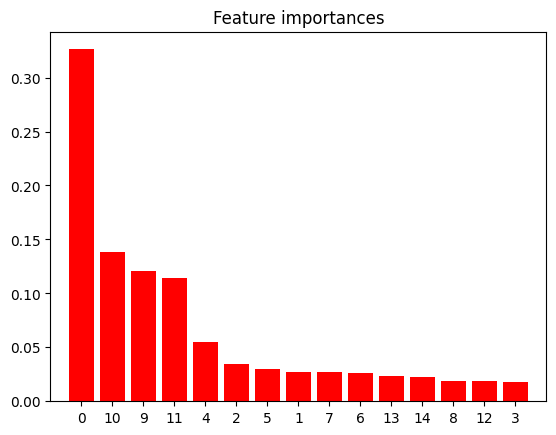

In [62]:
# using k fold cross validation
# param_grid = {'max_depth': [5, 10, 15, 20, 25, 30, 35, 40]}

# rf_consult = RandomForestRegressor(n_estimators=20)
# grid_search = GridSearchCV(rf_consult, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(data_time_stamped_consultancy, tgd_consultancy_outputs)

# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", -grid_search.best_score_)

# got best max depth=30 which is high enough to not put a limit, large data so overfitting problem not there


rf_consult = RandomForestRegressor()
rf_consult.fit(data_time_stamped_consultancy, tgd_consultancy_outputs)
pred_consult = rf_consult.predict(data_time_stamped_consultancy)

# Find the feature importances
importances = rf_consult.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(data_time_stamped_consultancy.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_time_stamped_consultancy.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(data_time_stamped_consultancy.shape[1]), indices)
plt.xlim([-1, data_time_stamped_consultancy.shape[1]])
plt.show()



Feature ranking:
1. Feature 0 (0.326199)
2. Feature 10 (0.138021)
3. Feature 9 (0.120288)
4. Feature 11 (0.114614)
5. Feature 4 (0.054801)
6. Feature 2 (0.034655)
7. Feature 5 (0.029976)
8. Feature 1 (0.026994)
9. Feature 7 (0.026914)
10. Feature 6 (0.026654)
11. Feature 13 (0.023276)
12. Feature 14 (0.022393)
13. Feature 8 (0.018875)
14. Feature 12 (0.018790)
15. Feature 3 (0.017550)


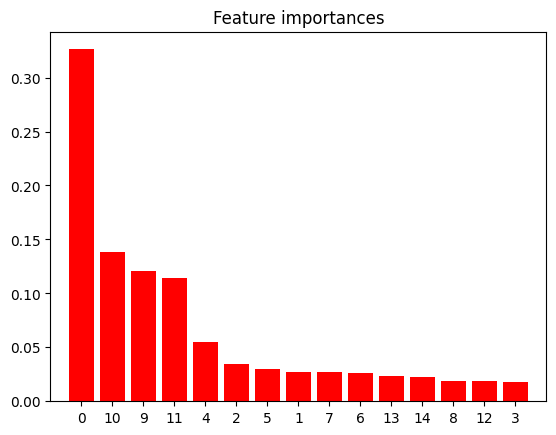

In [63]:
# Find the feature importances
importances = rf_consult.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(data_time_stamped_consultancy.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_time_stamped_consultancy.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(data_time_stamped_consultancy.shape[1]), indices)
plt.xlim([-1, data_time_stamped_consultancy.shape[1]])
plt.show()

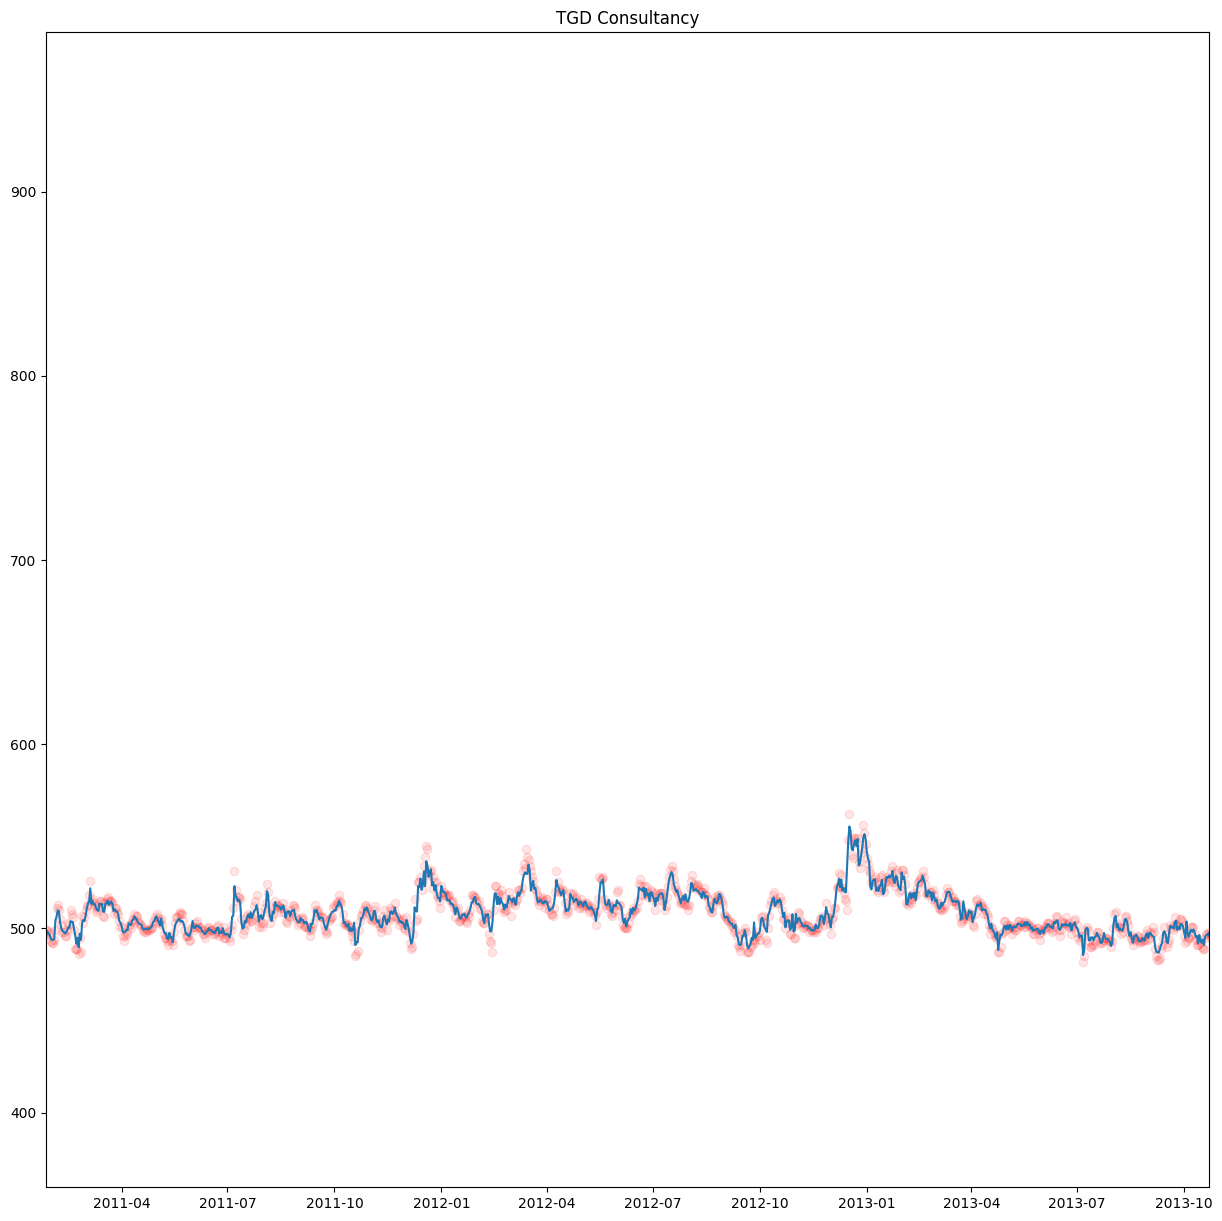

In [64]:
#plot the figure
plt.figure(figsize = (15,15))
plt.plot(np.array(tgd_consultancy_inputs['dates']),pred_consult)
plt.scatter(tgd_consultancy_inputs['dates'], tgd_consultancy_outputs, c = 'r', alpha = 0.1)
plt.xlim(15000, 16000)
plt.title('TGD Consultancy')
plt.show()

In [65]:
# for predicting tgd Power

In [66]:
tgd_power_inputs = train_data.drop(['TGD Power Share price', 'TGD Automobiles Share price'], axis=1)
#Using consultancy data as correlation found

In [67]:
tgd_power_inputs

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519.0
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518.0
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523.0
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522.0
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,2142-11-23,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,498.0
161764,2142-11-24,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.0
161765,2142-11-25,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,508.0
161766,2142-11-26,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,507.0


In [68]:
tgd_power_outputs = train_data['TGD Power Share price']

In [69]:
tgd_power_outputs

0         507.0
1         507.0
2         522.0
3         522.0
4         522.0
          ...  
161763    507.0
161764    507.0
161765    507.0
161766    507.0
161767    507.0
Name: TGD Power Share price, Length: 161768, dtype: float64

In [70]:
tgd_power_inputs['dates'] = pd.to_datetime(tgd_power_inputs['dates'])

In [71]:
tgd_power_inputs

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519.0
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518.0
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523.0
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522.0
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,2142-11-23,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,498.0
161764,2142-11-24,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.0
161765,2142-11-25,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,508.0
161766,2142-11-26,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,507.0


In [72]:
Y = np.array([tgd_power_inputs['dates'][i].timestamp() for i in range(len(tgd_power_inputs))])
data_time_stamped_power = tgd_power_inputs.assign(dates = Y)

In [73]:
data_time_stamped_power

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price
0,-8.520336e+09,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519.0
1,-8.520250e+09,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518.0
2,-8.520163e+09,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523.0
3,-8.520077e+09,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522.0
4,-8.519990e+09,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,5.455987e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,498.0
161764,5.456074e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.0
161765,5.456160e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,508.0
161766,5.456246e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,507.0


In [74]:
rf_power = RandomForestRegressor()
rf_power.fit(data_time_stamped_power, tgd_power_outputs)
pred_power = rf_power.predict(data_time_stamped_power)

Feature ranking:
1. Feature 15 (0.497408)
2. Feature 0 (0.100296)
3. Feature 9 (0.042412)
4. Feature 10 (0.039294)
5. Feature 11 (0.036866)
6. Feature 13 (0.030115)
7. Feature 4 (0.029412)
8. Feature 1 (0.028966)
9. Feature 2 (0.028711)
10. Feature 8 (0.026514)
11. Feature 14 (0.025881)
12. Feature 3 (0.024251)
13. Feature 5 (0.024246)
14. Feature 6 (0.023825)
15. Feature 12 (0.021941)
16. Feature 7 (0.019864)


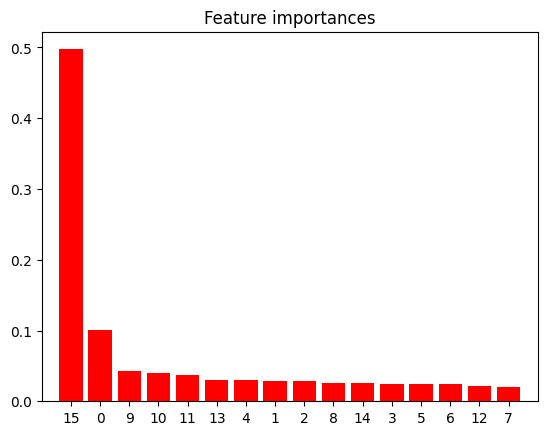

In [75]:
# Find the feature importances
importances = rf_power.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(data_time_stamped_power.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_time_stamped_power.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(data_time_stamped_power.shape[1]), indices)
plt.xlim([-1, data_time_stamped_power.shape[1]])
plt.show()

In [76]:
pred_power

array([507.04803922, 508.5       , 521.04803922, ..., 506.65      ,
       506.6       , 506.71090909])

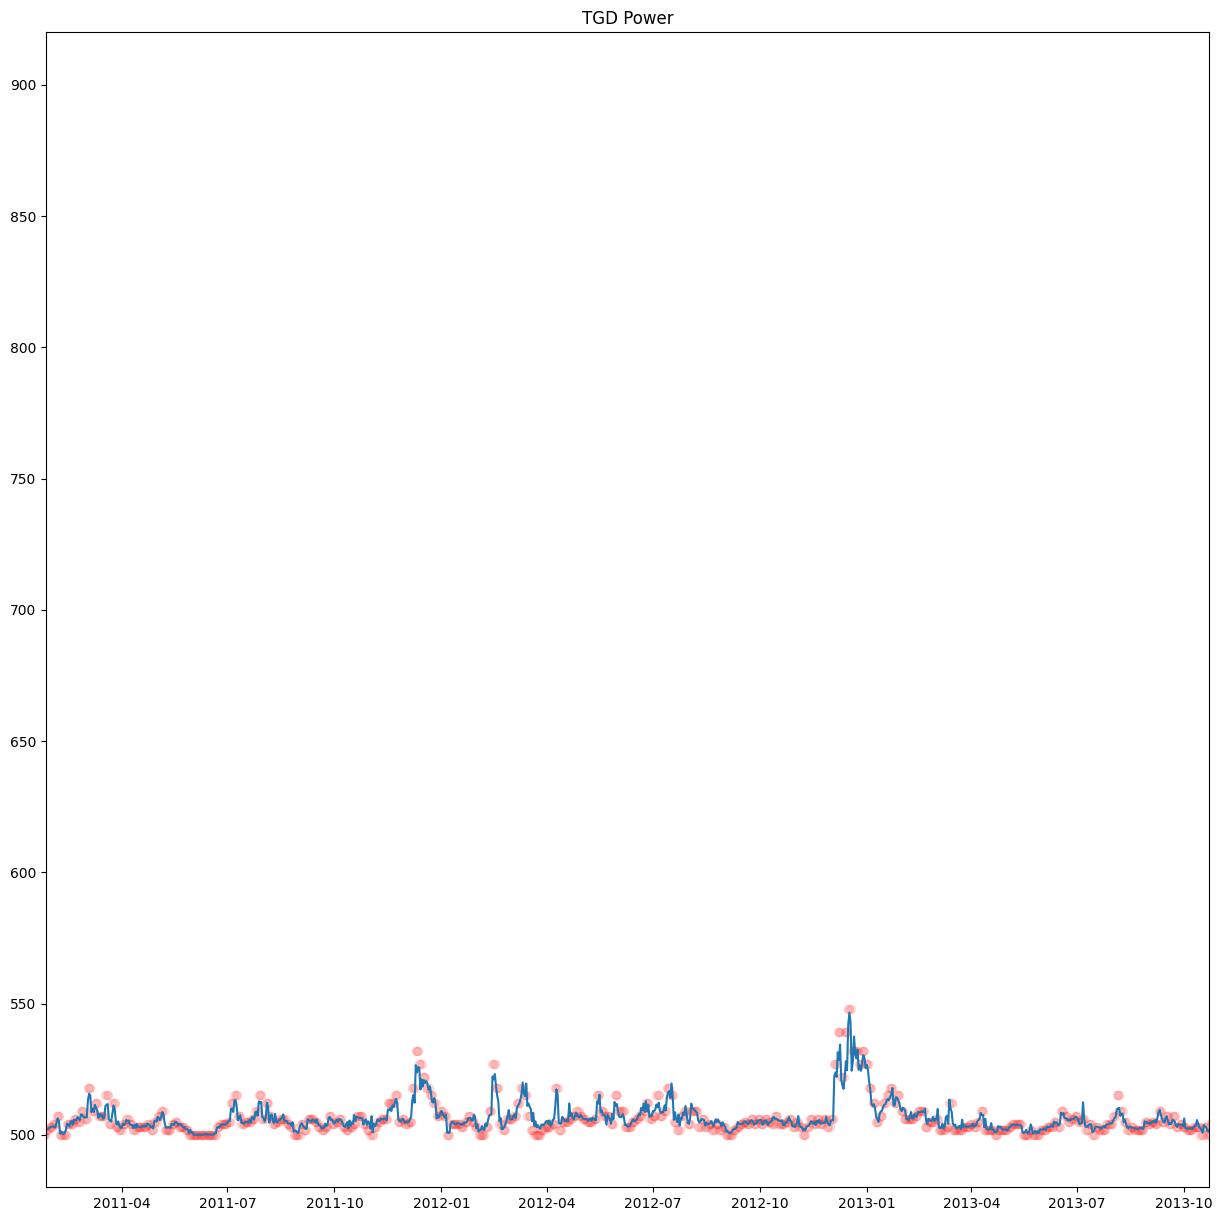

In [77]:
plt.figure(figsize = (15,15))
plt.plot(np.array(tgd_power_inputs['dates']),pred_power)
plt.scatter(tgd_power_inputs['dates'], tgd_power_outputs, c = 'r', alpha = 0.1)
plt.xlim(15000, 16000)
plt.title('TGD Power')
plt.show()

In [78]:
# for predicting TGD Automobiles  

In [79]:
tgd_automobiles_inputs = train_data.drop(['TGD Automobiles Share price'], axis=1)
# using both consultancy and power as correlation found

In [80]:
tgd_automobiles_inputs

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price,TGD Power Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519.0,507.0
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518.0,507.0
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523.0,522.0
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522.0,522.0
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522.0,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,2142-11-23,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,498.0,507.0
161764,2142-11-24,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.0,507.0
161765,2142-11-25,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,508.0,507.0
161766,2142-11-26,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,507.0,507.0


In [81]:
tgd_automobiles_outputs = train_data['TGD Automobiles Share price']

In [82]:
tgd_automobiles_outputs

0         420.0
1         420.0
2         437.0
3         437.0
4         437.0
          ...  
161763    420.0
161764    420.0
161765    420.0
161766    420.0
161767    420.0
Name: TGD Automobiles Share price, Length: 161768, dtype: float64

In [83]:
tgd_automobiles_inputs['dates'] = pd.to_datetime(tgd_automobiles_inputs['dates'])

In [84]:
tgd_automobiles_inputs

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price,TGD Power Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519.0,507.0
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518.0,507.0
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523.0,522.0
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522.0,522.0
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522.0,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,2142-11-23,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,498.0,507.0
161764,2142-11-24,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.0,507.0
161765,2142-11-25,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,508.0,507.0
161766,2142-11-26,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,507.0,507.0


In [85]:
Y = np.array([tgd_automobiles_inputs['dates'][i].timestamp() for i in range(len(tgd_automobiles_inputs))])
data_time_stamped_automobiles = tgd_automobiles_inputs.assign(dates = Y)

In [86]:
data_time_stamped_automobiles

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price,TGD Power Share price
0,-8.520336e+09,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519.0,507.0
1,-8.520250e+09,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518.0,507.0
2,-8.520163e+09,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523.0,522.0
3,-8.520077e+09,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522.0,522.0
4,-8.519990e+09,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522.0,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,5.455987e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,498.0,507.0
161764,5.456074e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.0,507.0
161765,5.456160e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,508.0,507.0
161766,5.456246e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,507.0,507.0


In [87]:
rf_auto = RandomForestRegressor()
rf_auto.fit(data_time_stamped_automobiles, tgd_automobiles_outputs)
pred_auto = rf_auto.predict(data_time_stamped_automobiles)

Feature ranking:
1. Feature 16 (1.000000)
2. Feature 7 (0.000000)
3. Feature 1 (0.000000)
4. Feature 2 (0.000000)
5. Feature 3 (0.000000)
6. Feature 4 (0.000000)
7. Feature 5 (0.000000)
8. Feature 6 (0.000000)
9. Feature 8 (0.000000)
10. Feature 15 (0.000000)
11. Feature 9 (0.000000)
12. Feature 10 (0.000000)
13. Feature 11 (0.000000)
14. Feature 12 (0.000000)
15. Feature 13 (0.000000)
16. Feature 14 (0.000000)
17. Feature 0 (0.000000)


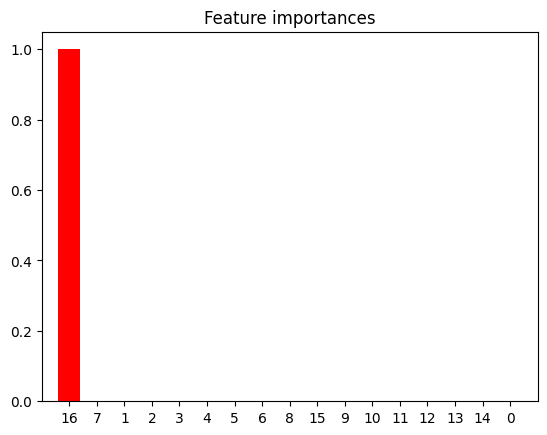

In [88]:
# Find the feature importances
importances = rf_auto.feature_importances_

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(data_time_stamped_automobiles.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

plt.figure()
plt.title("Feature importances")
plt.bar(range(data_time_stamped_automobiles.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(data_time_stamped_automobiles.shape[1]), indices)
plt.xlim([-1, data_time_stamped_automobiles.shape[1]])
plt.show()

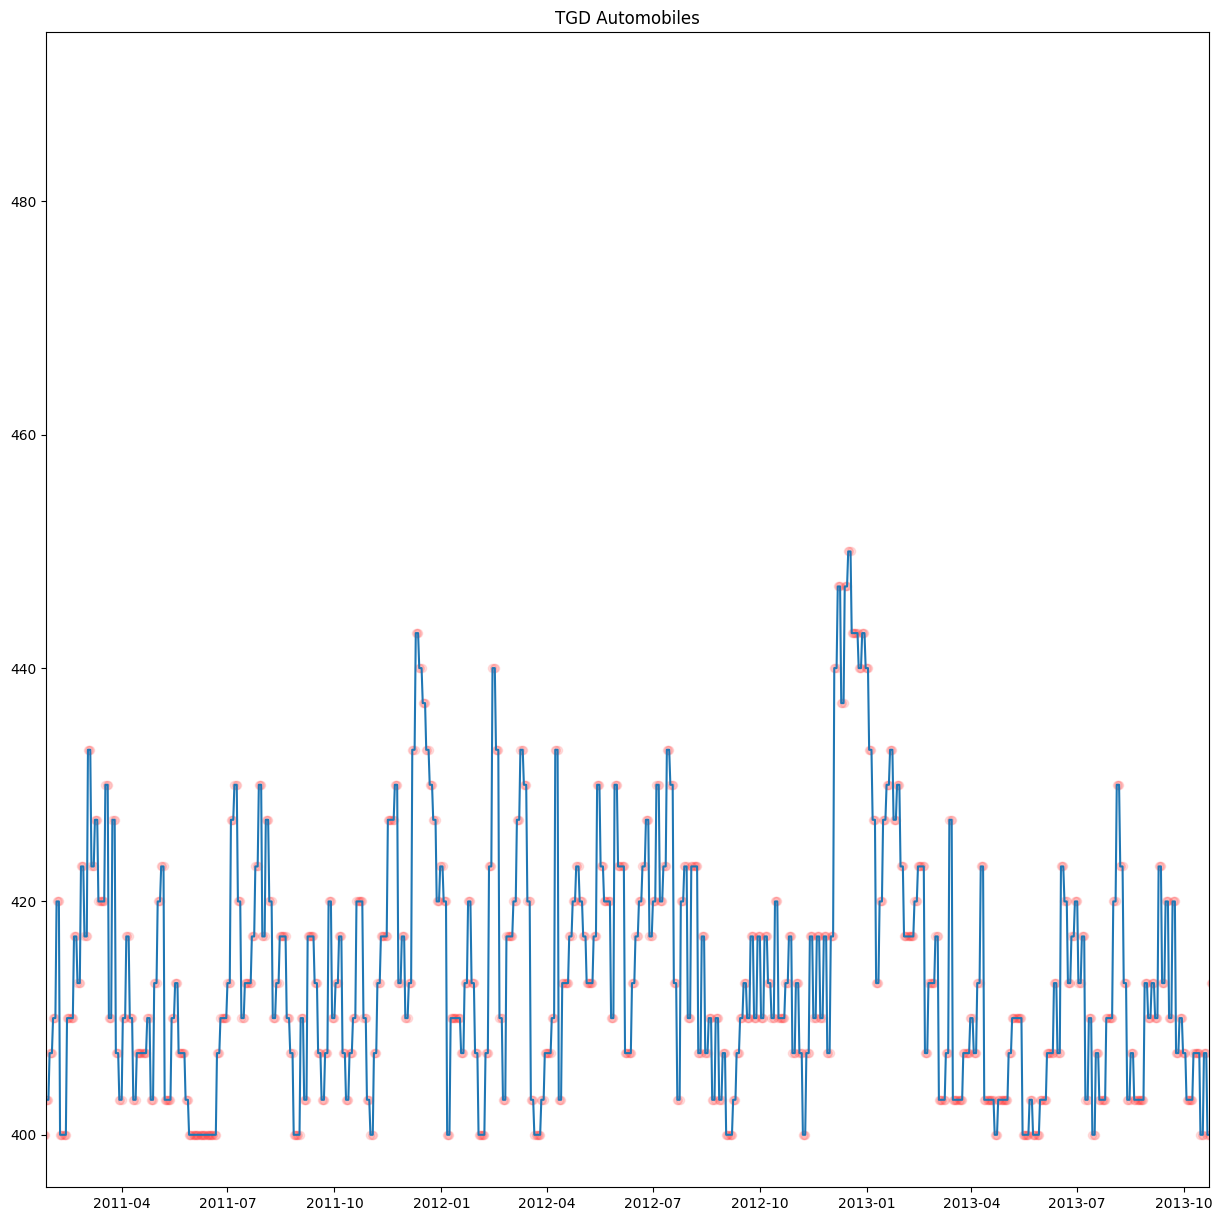

In [89]:
plt.figure(figsize = (15,15))
plt.plot(np.array(tgd_automobiles_inputs['dates']),pred_auto)
plt.scatter(tgd_automobiles_inputs['dates'], tgd_automobiles_outputs, c = 'r', alpha = 0.1)
plt.xlim(15000, 16000)
plt.title('TGD Automobiles')
plt.show()

In [90]:
sum=np.array(pred_auto + pred_consult + pred_power)
sum

array([1448.05937255, 1446.20119048, 1478.29803922, ..., 1432.9       ,
       1433.35      , 1428.86090909])

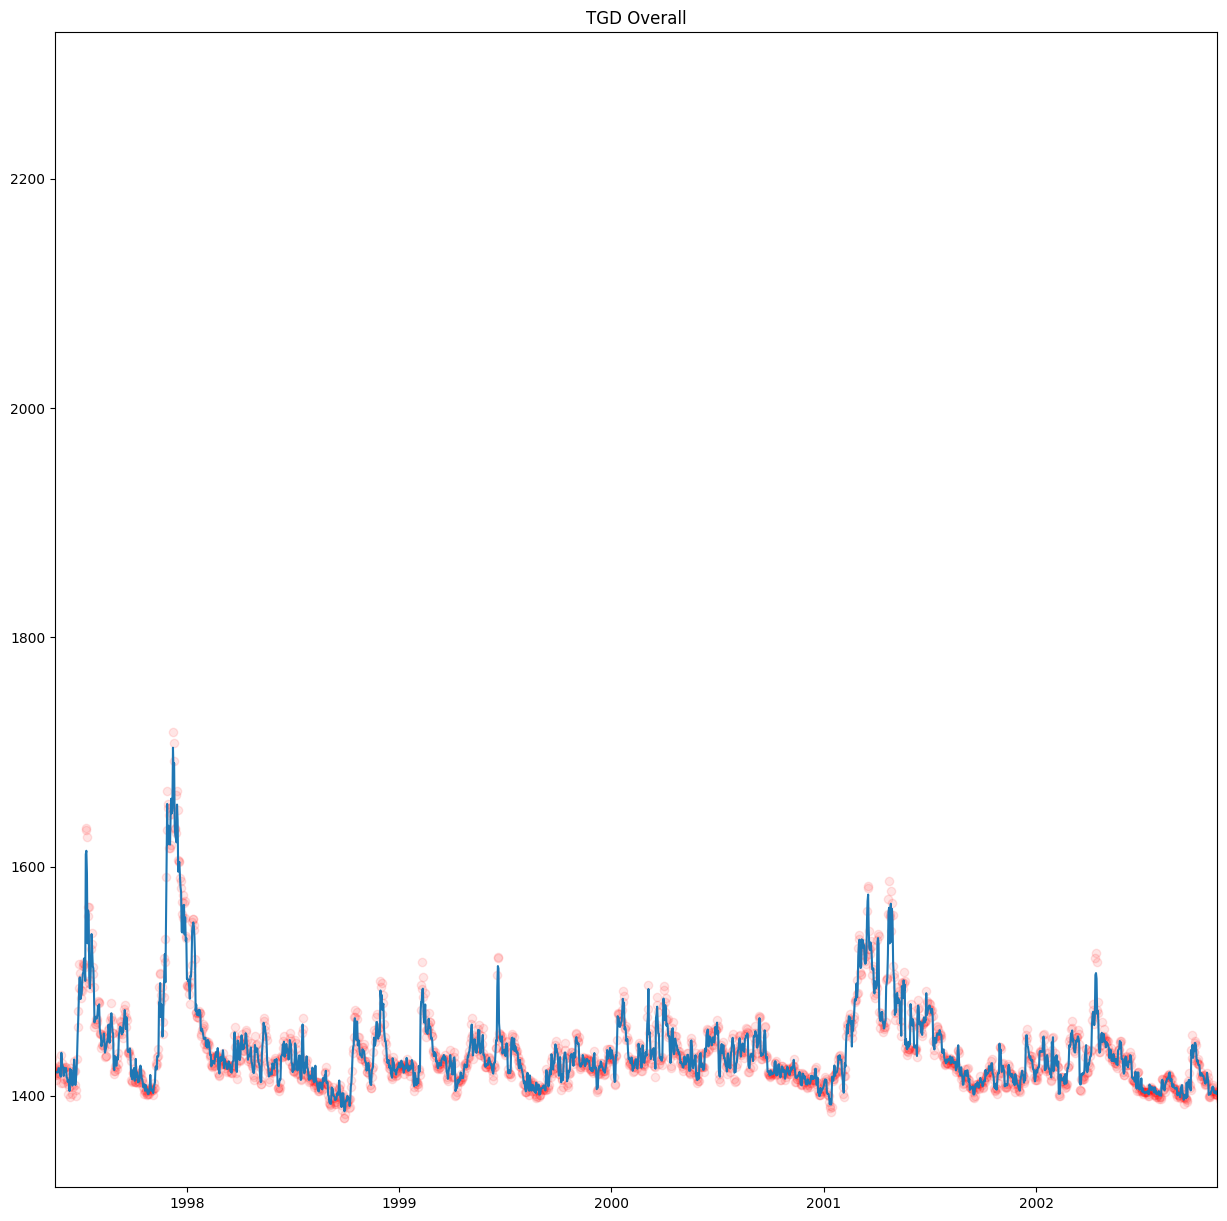

In [91]:
plt.figure(figsize = (15,15))
plt.plot(np.array(tgd_power_inputs['dates']),pred_auto + pred_consult + pred_power)
plt.scatter(tgd_power_inputs['dates'], tgd_power_outputs + tgd_automobiles_outputs + tgd_consultancy_outputs, c = 'r', alpha = 0.1)
plt.xlim(10000, 12000)
plt.title('TGD Overall')
plt.show()

In [92]:
test_data = pd.read_csv('test.csv')

In [93]:
test_data

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,2142-11-28,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
1,2142-11-29,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2,2142-11-30,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
3,2142-12-01,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
4,2142-12-02,503.94,497.55,499.63,894.7,502.82,94705.0,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2225-01-12,500.82,506.68,500.90,893.7,504.21,233367.0,501.30,499.24,736.27,586.38,507.95,514.26,496.98,500.78
29996,2225-01-13,499.46,503.79,505.45,913.4,504.21,180508.0,501.44,497.56,736.31,586.31,507.96,514.11,498.10,501.06
29997,2225-01-14,501.84,504.53,505.15,903.9,503.90,193973.0,501.27,497.46,736.38,586.23,507.98,514.49,497.65,500.21
29998,2225-01-15,496.40,505.25,500.41,929.0,503.16,167564.0,501.16,499.57,736.41,586.19,507.98,514.53,498.27,501.61


In [119]:
test_data['dates'] = pd.to_datetime(test_data['dates'])
Y = np.array([test_data['dates'][i].timestamp() for i in range(len(test_data))])
data_time_stamped_test_data = test_data.assign(dates = Y)
data_time_stamped_test_data

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,5.456419e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
1,5.456506e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2,5.456592e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
3,5.456678e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
4,5.456765e+09,503.94,497.55,499.63,894.7,502.82,94705.0,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,8.047987e+09,500.82,506.68,500.90,893.7,504.21,233367.0,501.30,499.24,736.27,586.38,507.95,514.26,496.98,500.78
29996,8.048074e+09,499.46,503.79,505.45,913.4,504.21,180508.0,501.44,497.56,736.31,586.31,507.96,514.11,498.10,501.06
29997,8.048160e+09,501.84,504.53,505.15,903.9,503.90,193973.0,501.27,497.46,736.38,586.23,507.98,514.49,497.65,500.21
29998,8.048246e+09,496.40,505.25,500.41,929.0,503.16,167564.0,501.16,499.57,736.41,586.19,507.98,514.53,498.27,501.61


Uncertainty for each individual prediction: [4.72237927 6.13117189 4.49613642 ... 4.82004385 5.87903912 5.02053473]


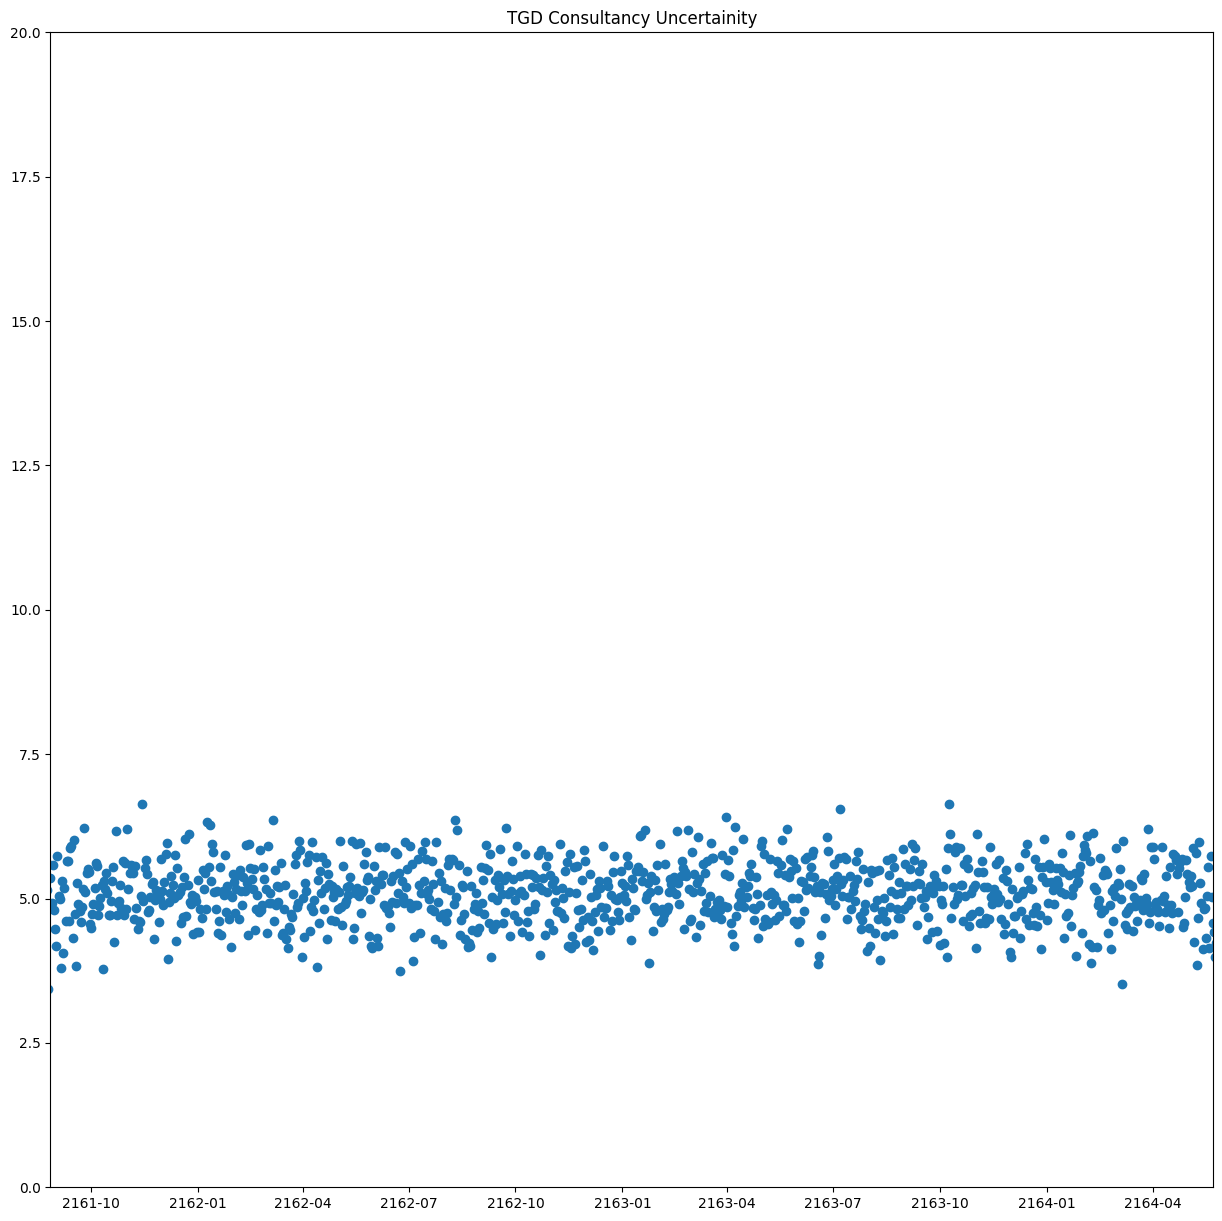

In [120]:
#Bootstrap
n_samples = 100
bootstraps = []
for i in range(n_samples):
    indices = np.random.choice(data_time_stamped_test_data.shape[0], size=data_time_stamped_test_data.shape[0], replace=True)
    bootstrap_sample = data_time_stamped_test_data.iloc[indices]
    bootstraps.append(bootstrap_sample)

# Consultancy
#Predictions on Bootstrap samples
predictions = []
for bootstrap_sample in bootstraps:
    y_pred = rf_consult.predict(bootstrap_sample)
    predictions.append(y_pred)

# Uncertanity score calculate
uncertainty_consult = np.std(predictions, axis = 0)
print(f"Uncertainty for each individual prediction: {uncertainty_consult}")
plt.figure(figsize = (15,15))
plt.scatter(np.array(test_data['dates']),uncertainty_consult)
#plt.scatter(tgd_power_inputs['dates'], tgd_power_outputs + tgd_automobiles_outputs + tgd_consultancy_outputs, c = 'r', alpha = 0.1)
#plt.xlim(15, 500)
plt.axis([70000,71000 , 0 , 20])
plt.title('TGD Consultancy Uncertainity')
plt.show()

In [121]:

test_consult=rf_consult.predict(data_time_stamped_test_data)
data_time_stamped_test_data['TGD Consultancy Share price'] = test_consult.tolist()
#using consultancy prediction data
data_time_stamped_test_data

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price
0,5.456419e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.15
1,5.456506e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.15
2,5.456592e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.15
3,5.456678e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.15
4,5.456765e+09,503.94,497.55,499.63,894.7,502.82,94705.0,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44,497.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,8.047987e+09,500.82,506.68,500.90,893.7,504.21,233367.0,501.30,499.24,736.27,586.38,507.95,514.26,496.98,500.78,500.10
29996,8.048074e+09,499.46,503.79,505.45,913.4,504.21,180508.0,501.44,497.56,736.31,586.31,507.96,514.11,498.10,501.06,501.65
29997,8.048160e+09,501.84,504.53,505.15,903.9,503.90,193973.0,501.27,497.46,736.38,586.23,507.98,514.49,497.65,500.21,499.25
29998,8.048246e+09,496.40,505.25,500.41,929.0,503.16,167564.0,501.16,499.57,736.41,586.19,507.98,514.53,498.27,501.61,503.40


Uncertainty for each individual prediction: [2.95198205 2.67977085 3.05338671 ... 2.8664335  3.56042465 2.89183597]


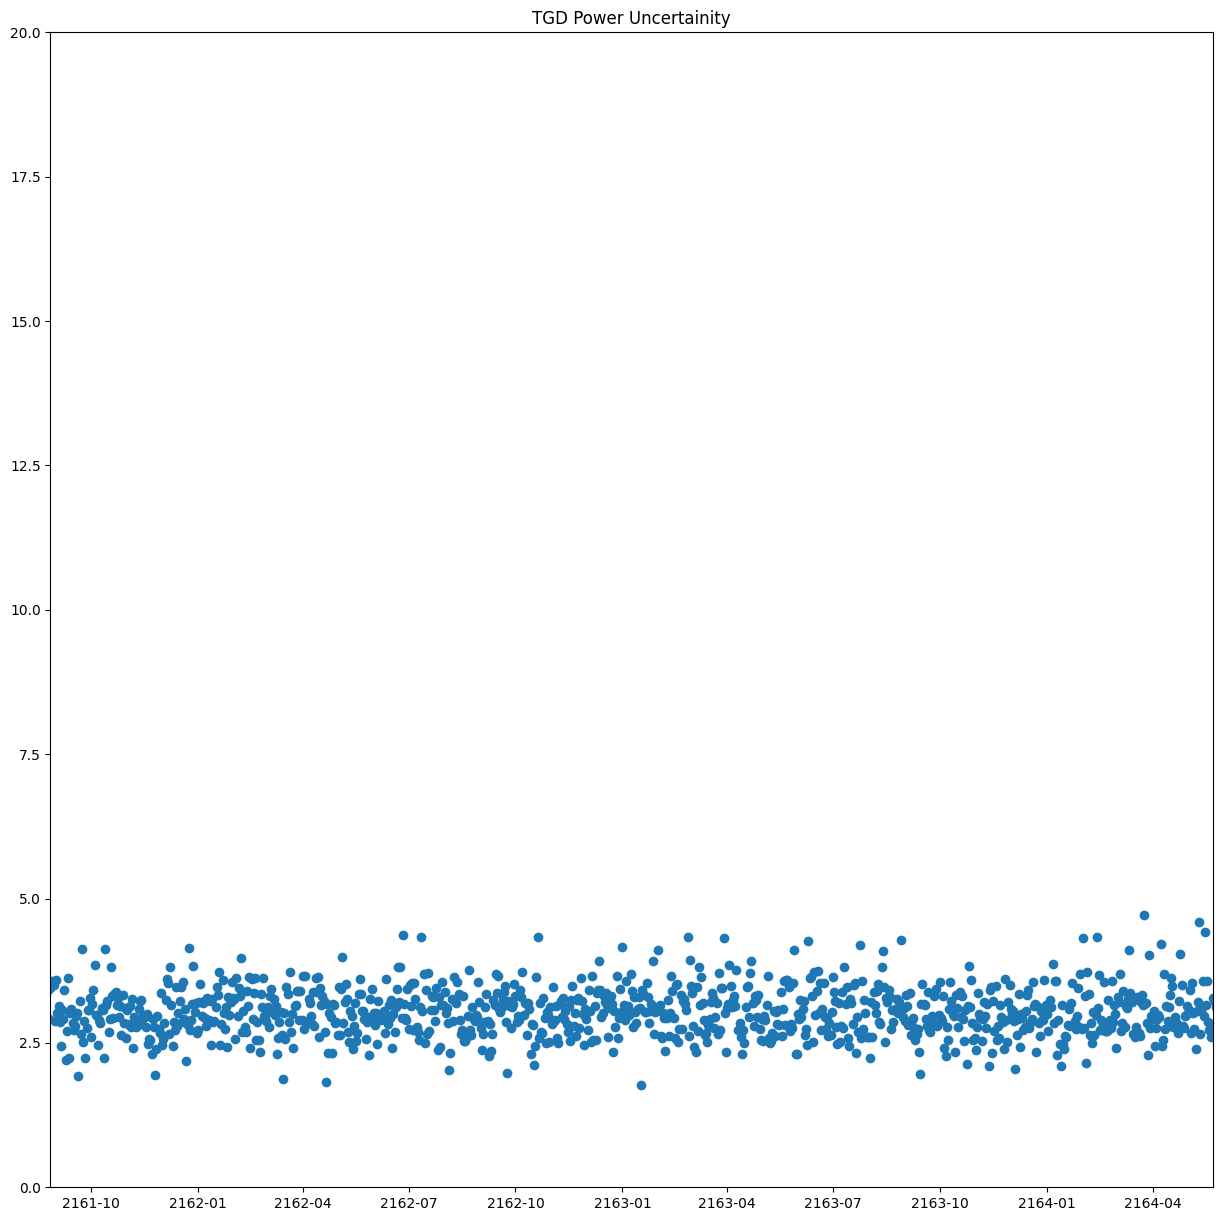

In [122]:
#Bootstrap
n_samples = 100
bootstraps = []
for i in range(n_samples):
    indices = np.random.choice(data_time_stamped_test_data.shape[0], size=data_time_stamped_test_data.shape[0], replace=True)
    bootstrap_sample = data_time_stamped_test_data.iloc[indices]
    bootstraps.append(bootstrap_sample)

# 3. Power
#Predictions on Bootstrap samples
predictions = []
for bootstrap_sample in bootstraps:
    y_pred = rf_power.predict(bootstrap_sample)
    predictions.append(y_pred)

# Uncertanity score calculate
uncertainty_power = np.std(predictions, axis = 0)
print(f"Uncertainty for each individual prediction: {uncertainty_power}")
plt.figure(figsize = (15,15))
plt.scatter(np.array(test_data['dates']),uncertainty_power)
#plt.scatter(tgd_power_inputs['dates'], tgd_power_outputs + tgd_automobiles_outputs + tgd_consultancy_outputs, c = 'r', alpha = 0.1)
#plt.xlim(15, 500)
plt.axis([70000,71000 , 0 , 20])
plt.title('TGD Power Uncertainity')
plt.show()

In [123]:
test_power=rf_power.predict(data_time_stamped_test_data)
data_time_stamped_test_data['TGD Power Share price'] = test_power.tolist()
#using power prediction data
data_time_stamped_test_data

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price,TGD Power Share price
0,5.456419e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.15,506.450909
1,5.456506e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.15,506.450909
2,5.456592e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.15,506.450909
3,5.456678e+09,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.15,506.450909
4,5.456765e+09,503.94,497.55,499.63,894.7,502.82,94705.0,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44,497.05,506.349195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,8.047987e+09,500.82,506.68,500.90,893.7,504.21,233367.0,501.30,499.24,736.27,586.38,507.95,514.26,496.98,500.78,500.10,508.840220
29996,8.048074e+09,499.46,503.79,505.45,913.4,504.21,180508.0,501.44,497.56,736.31,586.31,507.96,514.11,498.10,501.06,501.65,510.353226
29997,8.048160e+09,501.84,504.53,505.15,903.9,503.90,193973.0,501.27,497.46,736.38,586.23,507.98,514.49,497.65,500.21,499.25,509.003226
29998,8.048246e+09,496.40,505.25,500.41,929.0,503.16,167564.0,501.16,499.57,736.41,586.19,507.98,514.53,498.27,501.61,503.40,506.248757


Uncertainty for each individual prediction: [5.1050857  5.40570069 5.17010638 ... 5.70434922 5.45647322 5.34288312]


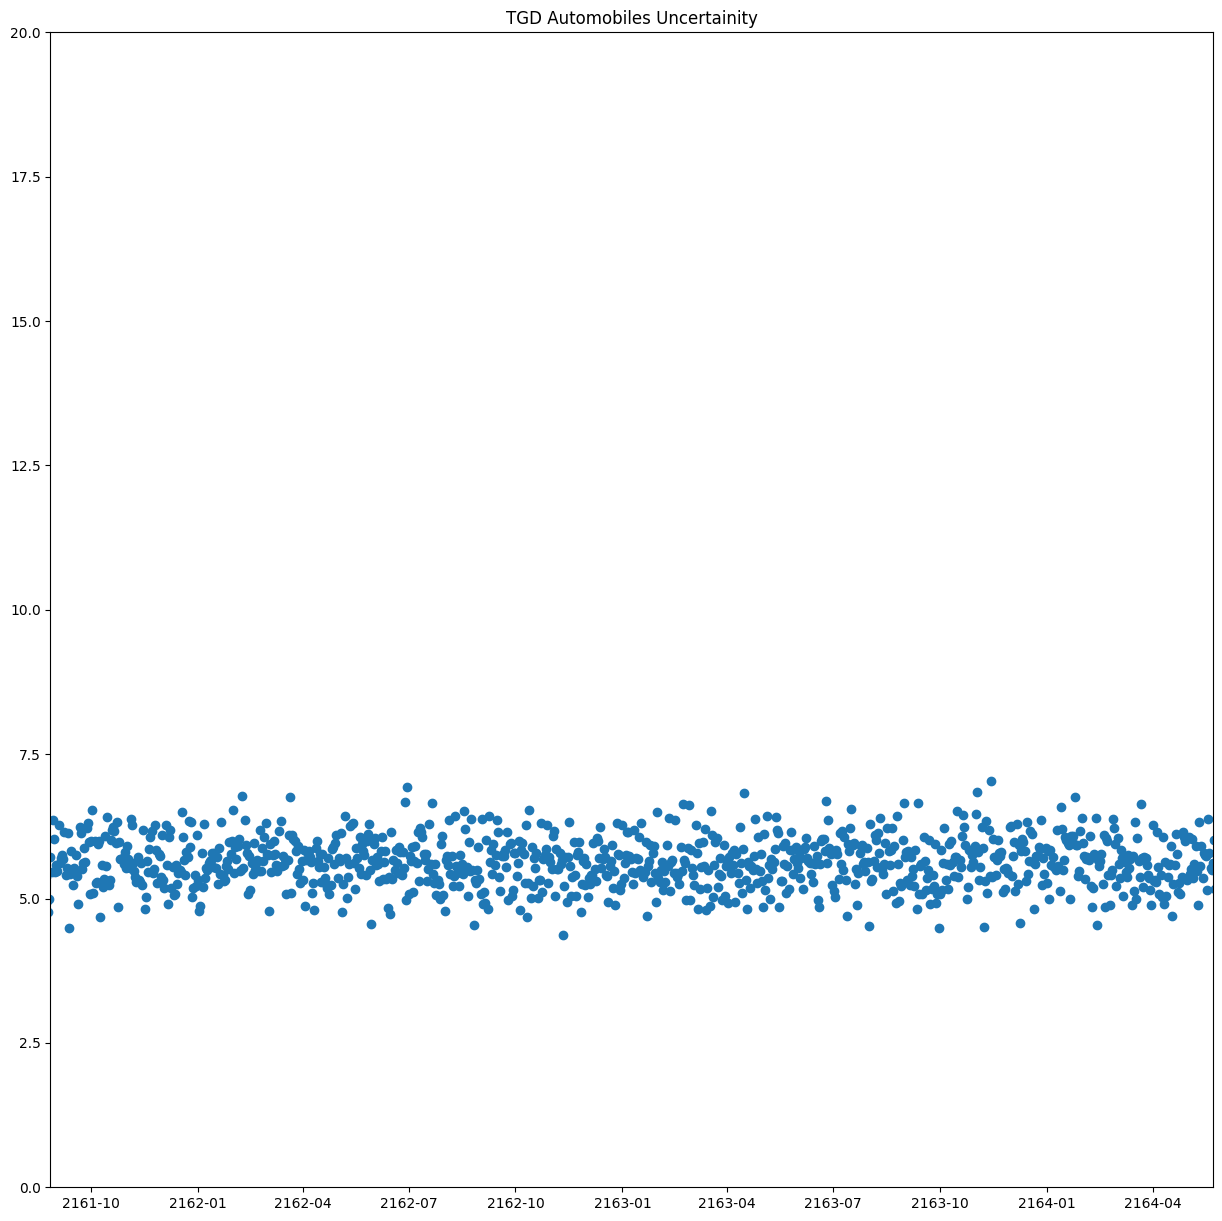

In [124]:
#Bootstrap
n_samples = 100
bootstraps = []
for i in range(n_samples):
    indices = np.random.choice(data_time_stamped_test_data.shape[0], size=data_time_stamped_test_data.shape[0], replace=True)
    bootstrap_sample = data_time_stamped_test_data.iloc[indices]
    bootstraps.append(bootstrap_sample)

#Predictions on Bootstrap samples
predictions = []
for bootstrap_sample in bootstraps:
    y_pred = rf_auto.predict(bootstrap_sample)
    predictions.append(y_pred)

# Uncertanity score calculate
uncertainty_auto = np.std(predictions, axis = 0)
print(f"Uncertainty for each individual prediction: {uncertainty_auto}")
plt.figure(figsize = (15,15))
plt.scatter(np.array(test_data['dates']),uncertainty_auto)
plt.axis([70000,71000 , 0 , 20])
plt.title('TGD Automobiles Uncertainity')
plt.show()

In [125]:
test_auto=rf_auto.predict(data_time_stamped_test_data)
data_time_stamped_test_data['TGD Automobiles Share price'] = test_power.tolist()
data_time_stamped_test_data
result=np.array(test_power + test_consult + test_auto)

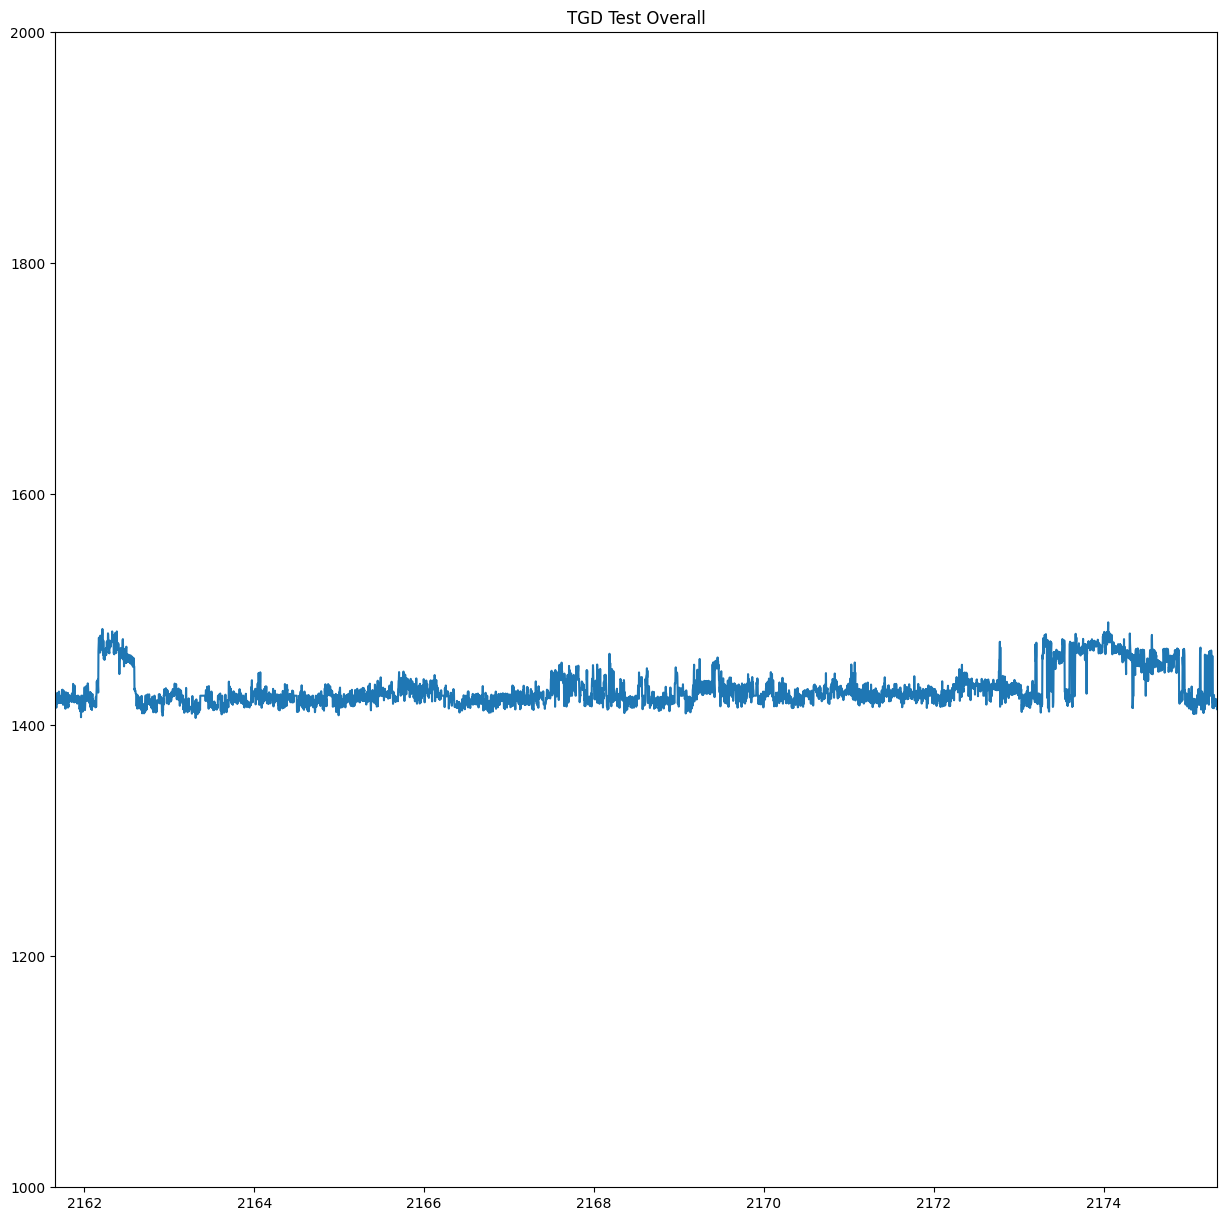

In [126]:
plt.figure(figsize = (15,15))
plt.plot(np.array(test_data['dates']),test_power + test_consult + test_auto)
plt.axis([70000, 75000, 1000, 2000])
plt.title('TGD Test Overall')
plt.show()

In [127]:
df_test=pd.DataFrame(result)
df_test
df_test.to_csv('my_file_total.csv', index=True)